In [92]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import models
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Input,GlobalAveragePooling2D
from keras.applications import MobileNetV2,EfficientNetB0
from keras.optimizers import Adam,RMSprop
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [99]:
train_dir="D:\\AI Project\\Bone\\data\\train"
test_dir="D:\\AI Project\\Bone\\data\\test"


train_datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2,
    rotation_range=30,         # تدوير الصورة لحد 30 درجة
    width_shift_range=0.2,     # تحريك الصورة أفقياً بنسبة 20%
    height_shift_range=0.2,    # تحريك الصورة رأسياً بنسبة 20%
    shear_range=0.2,           # قص مائل للصورة
    zoom_range=0.2,            # تكبير/تصغير بنسبة 20%
    horizontal_flip=True,      # قلب الصورة بشكل أفقي
    fill_mode='nearest'        # طريقة تعبئة البكسلات بعد التحريك
)
test_datagn=ImageDataGenerator(rescale=1/255)


train_set=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=10,
    class_mode="categorical",
    subset="training"
    )

valid_set=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=10,
    class_mode="categorical",
    subset="validation"
)

test_set=test_datagn.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=10,
    class_mode="categorical",
    shuffle=False
)

Found 796 images belonging to 10 classes.
Found 193 images belonging to 10 classes.
Found 140 images belonging to 10 classes.


In [84]:
train_set.class_indices

{'Avulsion fracture': 0,
 'Comminuted fracture': 1,
 'Fracture Dislocation': 2,
 'Greenstick fracture': 3,
 'Hairline Fracture': 4,
 'Impacted fracture': 5,
 'Longitudinal fracture': 6,
 'Oblique fracture': 7,
 'Pathological fracture': 8,
 'Spiral Fracture': 9}

In [85]:
labels=['Avulsion fracture','Comminuted fracture','Fracture Dislocation','Greenstick fracture','Hairline Fracture','Impacted fracture'
        ,'Longitudinal fracture','Oblique fracture','Pathological fracture','Spiral Fracture']
print(labels)

['Avulsion fracture', 'Comminuted fracture', 'Fracture Dislocation', 'Greenstick fracture', 'Hairline Fracture', 'Impacted fracture', 'Longitudinal fracture', 'Oblique fracture', 'Pathological fracture', 'Spiral Fracture']


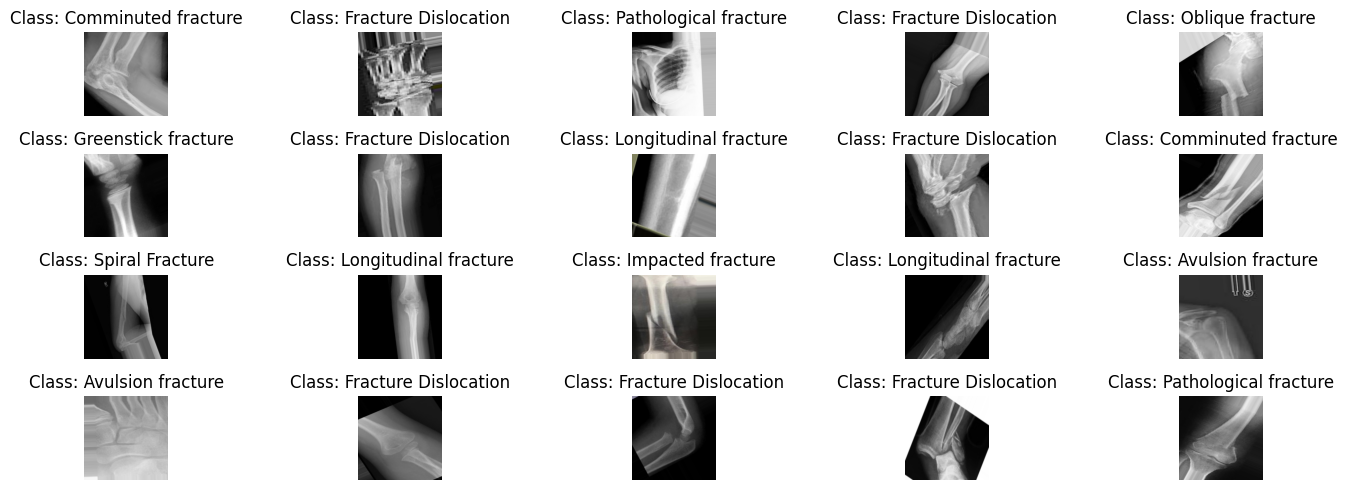

In [86]:
plt.figure(figsize=(15, 5))

for i in range(20):  
    plt.subplot(4, 5, i+1) 
    image, label = train_set.next()  
    plt.imshow(image[0])  
    plt.axis("off")  
    plt.title(f"Class: {labels[np.argmax(label)]}") 

plt.tight_layout()  
plt.show()

In [87]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # نجمد الوزنات بتاعته مؤقتاً

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

9406464/9406464 [==============================] - 2s 0us/step
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_27 (Dense)            (None, 128)               163968    
                                                                 
 dense_28 (Dense)            (None, 10)                1290      
                                                                 
Total params: 2,423,242
Trainable params: 165,258
Non-trainable params: 2,257,984
_________________________________________

In [89]:
model.compile(optimizer=Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [90]:
histroy=model.fit(train_set,epochs=30,batch_size=10,validation_data=valid_set)

Epoch 1/30
80/80 [==============================] - 9s 95ms/step - loss: 2.3085 - accuracy: 0.1822 - val_loss: 2.1823 - val_accuracy: 0.2124
Epoch 2/30
80/80 [==============================] - 7s 86ms/step - loss: 2.0406 - accuracy: 0.2802 - val_loss: 2.2130 - val_accuracy: 0.1969
Epoch 3/30
80/80 [==============================] - 7s 87ms/step - loss: 1.9198 - accuracy: 0.3291 - val_loss: 2.2303 - val_accuracy: 0.2124
Epoch 4/30
80/80 [==============================] - 7s 88ms/step - loss: 1.8094 - accuracy: 0.3719 - val_loss: 2.2461 - val_accuracy: 0.2332
Epoch 5/30
80/80 [==============================] - 7s 89ms/step - loss: 1.7265 - accuracy: 0.3945 - val_loss: 2.2223 - val_accuracy: 0.3161
Epoch 6/30
80/80 [==============================] - 7s 87ms/step - loss: 1.6565 - accuracy: 0.4284 - val_loss: 2.3279 - val_accuracy: 0.2902
Epoch 7/30
80/80 [==============================] - 7s 88ms/step - loss: 1.6018 - accuracy: 0.4372 - val_loss: 2.1899 - val_accuracy: 0.2694
Epoch 8/30
80

In [93]:
# Load base model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # نثبّت ال backbone

# Build your model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')  # عدل 10 على حسب عدد الكلاسات عندك
])

# Compile
model.compile(optimizer=Adam(learning_rate=0.0005),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

# Train
history = model.fit(
    train_set,
    epochs=30,
    validation_data=valid_set,
    callbacks=[early_stop]
)


Epoch 1/30
80/80 [==============================] - 12s 103ms/step - loss: 2.3403 - accuracy: 0.1118 - val_loss: 2.2887 - val_accuracy: 0.1347
Epoch 2/30
80/80 [==============================] - 8s 96ms/step - loss: 2.2953 - accuracy: 0.1394 - val_loss: 2.2778 - val_accuracy: 0.1399
Epoch 3/30
80/80 [==============================] - 7s 88ms/step - loss: 2.2902 - accuracy: 0.1068 - val_loss: 2.2793 - val_accuracy: 0.1399
Epoch 4/30
80/80 [==============================] - 7s 91ms/step - loss: 2.2855 - accuracy: 0.1357 - val_loss: 2.2730 - val_accuracy: 0.1399
Epoch 5/30
80/80 [==============================] - 7s 87ms/step - loss: 2.2868 - accuracy: 0.1307 - val_loss: 2.2776 - val_accuracy: 0.1347
Epoch 6/30
80/80 [==============================] - 8s 99ms/step - loss: 2.2862 - accuracy: 0.1307 - val_loss: 2.2748 - val_accuracy: 0.1347
Epoch 7/30
80/80 [==============================] - 9s 111ms/step - loss: 2.2787 - accuracy: 0.1256 - val_loss: 2.2726 - val_accuracy: 0.1399
Epoch 8/30

In [94]:
model = Sequential([
    Input(shape=(224, 224, 3)),  
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  
])
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(test_set, batch_size=10, epochs=10,verbose = 1)


Epoch 1/10
14/14 [==============================] - 3s 60ms/step - loss: 4.8842 - accuracy: 0.1000
Epoch 2/10
14/14 [==============================] - 1s 60ms/step - loss: 2.2929 - accuracy: 0.1286
Epoch 3/10
14/14 [==============================] - 1s 60ms/step - loss: 2.1870 - accuracy: 0.2357
Epoch 4/10
14/14 [==============================] - 1s 61ms/step - loss: 1.7505 - accuracy: 0.4714
Epoch 5/10
14/14 [==============================] - 1s 61ms/step - loss: 0.9755 - accuracy: 0.7929
Epoch 6/10
14/14 [==============================] - 1s 61ms/step - loss: 0.5364 - accuracy: 0.8500
Epoch 7/10
14/14 [==============================] - 1s 61ms/step - loss: 0.3205 - accuracy: 0.9143
Epoch 8/10
14/14 [==============================] - 1s 61ms/step - loss: 0.1880 - accuracy: 0.9929
Epoch 9/10
14/14 [==============================] - 1s 61ms/step - loss: 0.0665 - accuracy: 0.9929
Epoch 10/10
14/14 [==============================] - 1s 60ms/step - loss: 0.0291 - accuracy: 1.0000


In [100]:
test_loss,test_acc=model.evaluate(test_set)
print(test_acc)

14/14 [==============================] - 0s 18ms/step - loss: 0.0152 - accuracy: 1.0000
1.0


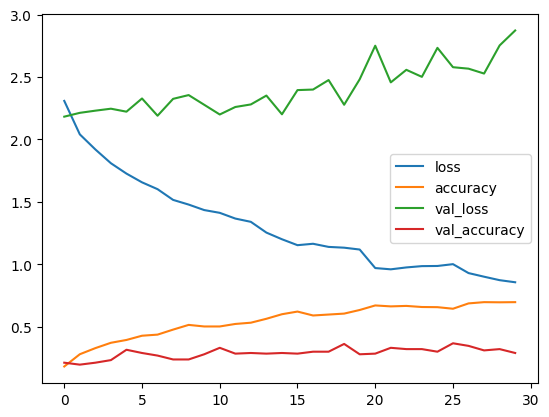

In [96]:
pd.DataFrame(histroy.history).plot()
plt.show()

In [97]:
model.save("Bone.h5")